# Завдання 5: Регресія

У цій частині практичної роботі дослідимо властивості лінійної регресії.

Для самоконтролю використовуються тести автогрейдера (from gofer.ok import check), як і в поперідній работі. Якщо Ви їх ще не використовували, то для їх викоритання необхідно інсталювати два додаткових модуля (через CMD.exe Prompt в ANACONDA NAVIGATOR) а саме:

- **okgrade** (pip install okgrade) https://okgrade.readthedocs.io/_/downloads/en/latest/pdf/
- **gofer** (pip install git+https://github.com/grading/gradememaybe.git) https://okgrade.readthedocs.io/en/latest/install/

Якщо Ви не бажаєти їх викоритовувати, то закоментуйте відповідний рядок і не використовуйте рядки тесту (наприклад check('tests/q2_1.py'), ...). В такому разі Ви можете переглянути наявні тести у відповідній директорії

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

# These lines load the tests.
from gofer.ok import check

## 1. Наскільки точний Старий Служака? Продовжимо дослідження

Давайте повернемося до запитання з практичної 2_4(2024). У минулій практичній ми досліджували Old Faithful, гейзер у Йеллоустоунському національному парку в Сполучених Штатах. Він відомий тим, що вивергається за досить регулярним графіком.

Підсумовуючи раніше викладене - деякі з вивержень Old Faithful тривають довше, ніж інші. Сьогодні ми використаємо той самий набір даних щодо тривалості виверження та часу очікування, щоб побачити, чи зможемо ми передбачити час очікування на основі тривалості виверження за допомогою лінійної регресії.

Деякі виверження Old Faithful тривають довше, ніж інші. При тривалому виверженні зазвичай доводиться довше чекати наступного виверження.

Набір даних має один рядок для кожного виверження, що спостерігається. Він включає наступні стовпці:

- **duration**: тривалість виверження, у хвилинах
- **wait**: час між цим виверженням та наступним, також у хвилинах

Запустіть наступну комірку, щоб завантажити набір даних.


In [2]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


Згадайте, що в минулій практичній роботі ми дійшли висновку, що час виверження та час очікування мають позитивну кореляцію. Таблиця нижче під назвою `faithful_standard` містить тривалість виверження та час очікування в стандартних одиницях.

In [3]:
duration_mean = np.mean(faithful.column("duration"))
duration_std = np.std(faithful.column("duration"))
wait_mean = np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std
)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


У наступній комірці обчислюємо кореляцію  `r`

In [4]:
r = np.mean(faithful_standard.column(0) * faithful_standard.column(1))
r

0.90081116832181318

## 2. Лінія регресії

Коефіцієнт кореляції - це нахил (slope) лінії регресії, коли дані виражені в стандартних одиницях.

У наступній комірці відображається лінія регресії в стандартних одиницях:
$$\text{waiting time (standard units)} = r \times \text{eruption duration (standard units)}.$$

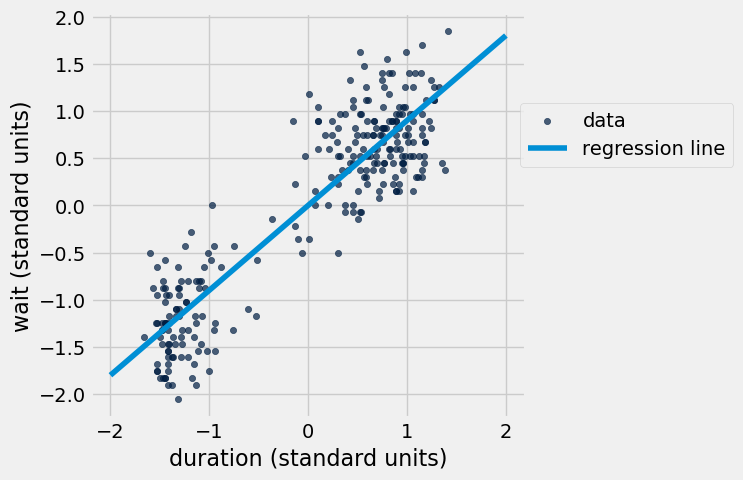

In [5]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

Як би ви взяли точку у стандартних одиницях (SU) і перетворили її назад у вхідні (оригінільні) одиниці вимірювання? Нам довелося б «розтягнути» її горизонтальне положення на `duration_std`, а вертикальне — на `wait_std`.

Це означає, що те саме станеться з нахилом лінії.

«Розтягування» лінії по горизонталі робить її менш крутою, тому ми ділимо нахил на коефіцієнт розтягування. Розтягування лінії по вертикалі робить її більш крутою, тому ми множимо нахил на коефіцієнт розтягування.

** <b>Завдання 2.1</b> **<br/>
Який нахил лінії регресії у вихідних одиницях?

(Якщо пояснення «розтягування» є неінтуїтивним, зверніться до лекції, або скористайтеся іншими джерелами, наприклад https://inferentialthinking.com/chapters/15/2/Regression_Line.html)

In [6]:
slope = r * (wait_std / duration_std)
slope

10.729641395133527

Ми знаємо, що лінія регресії проходить через точку `(duration_mean, wait_mean)`. Ви маєте пам’ятаєте з математики та наших попередніх занять, що рівняння для прямої має вигляд:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

Після того, як це рівняння трохи переписали, перетин (intercept) виявиться таким:

In [7]:
intercept = slope*(-duration_mean) + wait_mean
intercept

33.474397022753351

In [8]:
check('tests/q2_1.py')

## 3. Дослідження лінії регресії
Нахил (slope) і перетин (intercept) точно показують, як виглядає лінія регресії. Щоб передбачити час очікування виверження, помножте тривалість виверження на `slope`, а потім додайте `intercept`.

** <b>Завдання 3.1</b> ** <br/>
Обчисліть прогнозований час очікування для виверження, яке триває 2 хвилини, і для виверження, яке триває 5 хвилин.

In [9]:
two_minute_predicted_waiting_time = slope * 2 + intercept
five_minute_predicted_waiting_time = slope * 5 + intercept

# Here is a helper function to print out your predictions
# (you don't need to modify it):
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

After an eruption lasting 2 minutes, we predict you'll wait 54.933679813 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.1226039984 minutes until the next eruption.


In [10]:
check('tests/q3_1.py')

Наступна комірка будує лінію, що проходить між цими двома точками, яка є (відрізком) лінії регресії.

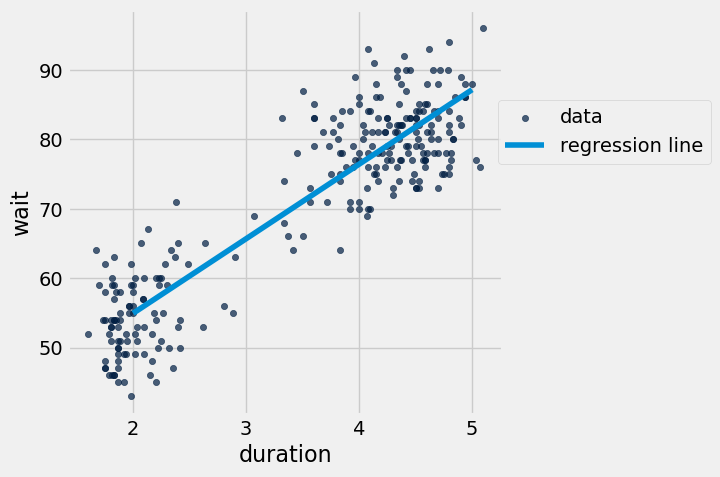

In [11]:
plot_data_and_line(faithful, "duration", "wait", 
                   [2, two_minute_predicted_waiting_time], 
                   [5, five_minute_predicted_waiting_time])

** <b>Завдання 3.2</b> ** <br/>
Зробіть прогноз щодо часу очікування після кожного виверження в таблиці `faithful`. (Звичайно, ми точно знаємо, яким був час очікування! Ми робимо це, щоб побачити, наскільки точні наші прогнози.) Помістіть ці числа в стовпець у новій таблиці під назвою `faithful_predictions`. 
Її перший рядок повинен виглядати так:

|duration|wait|predicted wait|
|-|-|-|
|3.6|79|72.1011|

*Підказка:* Ваша відповідь може складатися лише з одного рядка. Немає потреби в циклі `for`; натомість використовуйте арифметику масиву (numpy).

In [17]:
def add_predicted_wait_column(faithful):
    predicted_waits = intercept + slope * faithful.column("duration")
    faithful_with_pred_wait = faithful.with_column("predicted wait", predicted_waits)
    return faithful_with_pred_wait

faithful_predictions = add_predicted_wait_column(faithful)
faithful_predictions

duration,wait,predicted wait
3.6,79,72.1011
1.8,54,52.7878
3.333,74,69.2363
2.283,62,57.9702
4.533,85,82.1119
2.883,55,64.408
4.7,88,83.9037
3.6,85,72.1011
1.95,51,54.3972
4.35,85,80.1483


In [18]:
check('tests/q3_2.py')

** <b>Завдання 3.3</b> ** <br/>
Наскільки точними ми були в прогнозі? Ми обчислили нев'язку(*залишок*) для кожного виверження в наборі даних. Нев'язка (*залишок*) — це різниця (причому не абсолютна різниця) між фактичним часом очікування та прогнозованим часом очікування. Додайте нев'язки до `faithful_predictions` як новий стовпець під назвою `"residual"`, назвавши отриману таблицю `faithful_residuals`.

*Підказка:* Знову ж таки, Ваш код буде набагато простішим, якщо ви не використовуєте цикл `for`.

In [19]:
actual_wait = faithful_predictions.column("wait")
predicted_wait = faithful_predictions.column("predicted wait")
residuals = actual_wait - predicted_wait
faithful_residuals = faithful_predictions.with_column("residual", residuals)
faithful_residuals

duration,wait,predicted wait,residual
3.6,79,72.1011,6.89889
1.8,54,52.7878,1.21225
3.333,74,69.2363,4.76371
2.283,62,57.9702,4.02983
4.533,85,82.1119,2.88814
2.883,55,64.408,-9.40795
4.7,88,83.9037,4.09629
3.6,85,72.1011,12.8989
1.95,51,54.3972,-3.3972
4.35,85,80.1483,4.85166


In [20]:
check('tests/q3_3.py')

Побудуємо графік обчислених Вами нев'язок. Кожна точка відповідає одному виверженню. Це показує, наскільки наш прогноз перевищив або занизив час очікування.

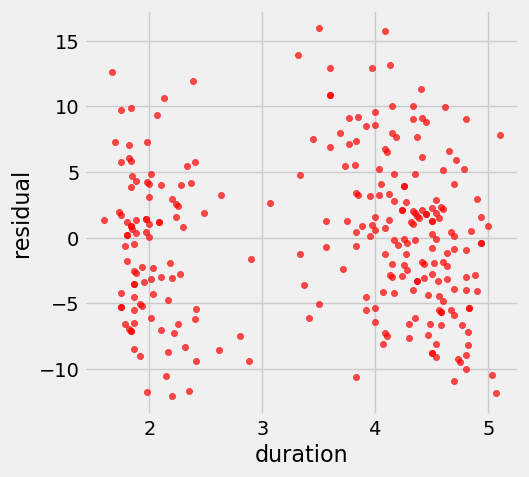

In [21]:
faithful_residuals.scatter("duration", "residual", color="r")

У нев'язках (*залишках*) не надто багато закономірностей, що підтверджують доцільність використання лінійної регресії для прогнозування. Це правда, що є дві окремі хмари; тривалість вивержень, здається, поділяється на два різних кластери. Але це лише закономірність тривалості виверження, а не закономірність співвідношення між тривалістю виверження та часом очікування. Більше занепокоєння викликає те, що в певній області горизонтальної осі може бути більше позитивних, ніж негативних залишків. Для обох кластерів точки розподілені досить рівномірно вище і нижче нуля, що є підтвердженням того, що залежність переважно лінійна.

## 4. Наскільки точні різні прогнози?
Коефіцієнт кореляції близький до 1, що означає, що спостережувані значення щільно згруповані навколо лінії регресії. Нев'язки (*залишки*) загалом невеликі (близько 0) порівняно з часом очікування.

Ми можемо побачити це візуально, побудувавши разом час очікування та нев'язки на одній діаграмі:

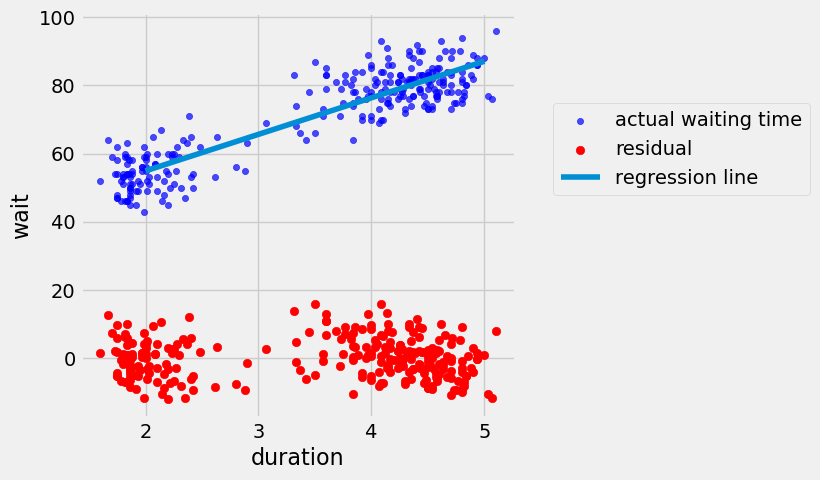

In [22]:
faithful_residuals.scatter("duration", "wait", label="actual waiting time", color="blue")
plots.scatter(faithful_residuals.column("duration"), faithful_residuals.column("residual"), label="residual", color="r")
plots.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time], label="regression line")
plots.legend(bbox_to_anchor=(1.7,.8));

** <b>Завдання 4.1</b> ** <br/>
У таблиці `faithful` жодне виверження не тривало рівно 0, 2.5 або 60 хвилин. Використовуючи комірку нижче спрогнозуйте, який прогнозований час очікування для виверження, яке триває 0 хвилин? 2.5 хвилини? годину?

In [23]:
zero_minute_predicted_waiting_time = slope * 0 + intercept
two_point_five_minute_predicted_waiting_time = slope * 2.5 + intercept
hour_predicted_waiting_time = slope * 60 + intercept

print_prediction(0, zero_minute_predicted_waiting_time)
print_prediction(2.5, two_point_five_minute_predicted_waiting_time)
print_prediction(60, hour_predicted_waiting_time)

After an eruption lasting 0 minutes, we predict you'll wait 33.4743970228 minutes until the next eruption.
After an eruption lasting 2.5 minutes, we predict you'll wait 60.2985005106 minutes until the next eruption.
After an eruption lasting 60 minutes, we predict you'll wait 677.252880731 minutes until the next eruption.


In [24]:
check('tests/q4_1.py')

## 5. Розділяй і володарюй

Давайте подивимося, що станеться, якщо по-різному розглядати два кластери спостережень. З діаграми розсіювання видно, що є два кластери точок: один для тривалості близько 2, а інший для тривалості від 3.5 до 5. Вертикальна лінія в 3-ці розділяє два кластери.

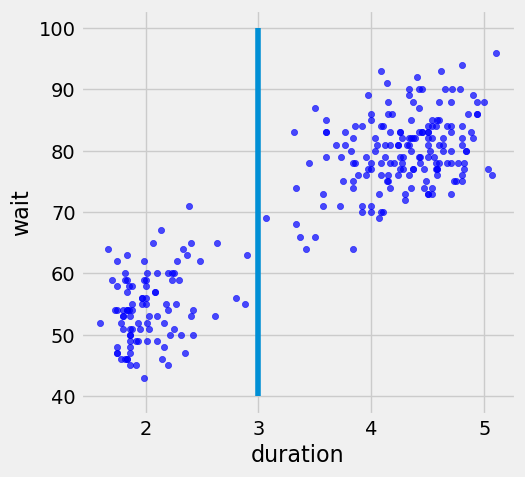

In [25]:
faithful.scatter("duration", "wait", label="actual waiting time", color="blue")
plots.plot([3, 3], [40, 100]);

Нижче наведено функцію `standardize` із лекції, яка повертає таблицю значень у стандартних одиницях.

In [27]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

**Завдання 5.1** <br/>
Окремо обчисліть коефіцієнти регресії *r* для всіх точок із тривалістю менше 3 **а потім** для всіх точок із тривалістю понад 3. Для цього створіть функцію, яка обчислює `r` із таблиці та передайте ці дві різні таблиці точок, `below_3` і `above_3` в створену функцію.

*Підказка*: Використовуйте метод *where* для вибірки http://www.data8.org/datascience/_autosummary/datascience.tables.Table.where.html#datascience.tables.Table.where

In [32]:
def reg_coeff(t):
    t_su = standardize(t)
    r = np.mean(t_su.column(0) * t_su.column(1))
    return r

below_3 = faithful.where(faithful.column("duration") < 3)
above_3 = faithful.where(faithful.column("duration") > 3)

below_3_r = reg_coeff(below_3)
above_3_r = reg_coeff(above_3)

print("For points below 3, r is", below_3_r, "; for points above 3, r is", above_3_r)

For points below 3, r is 0.290189526493 ; for points above 3, r is 0.372782225571


In [33]:
check('tests/q5_1.py')

**Завдання 5.2** <br/>
Напишіть функції `slope_of` і `intercept_of` нижче в комірці.

Коли ви закінчите, функції `wait_below_3` і `wait_above_3` мають використовувати окремі лінії регресії, щоб передбачити час очікування для певної тривалості. Перша функція має використовувати лінію регресії для всіх точок із тривалістю менше 3.2. Друга функція повинна використовувати лінію регресії для всіх точок із тривалістю понад 3.2.

In [36]:
def slope_of(t, r):
    """Return the slope of the regression line for t in original units."""
    std_dev_x = np.std(t.column(0))
    std_dev_y = np.std(t.column(1))
    return r * (std_dev_y / std_dev_x)

def intercept_of(t, r):
    """Return the intercept of the regression line for t in original units."""
    slope = slope_of(t, r)
    mean_of_x = np.mean(t.column(0))
    mean_of_y = np.mean(t.column(1))
    return mean_of_y - slope * mean_of_x
    
below_3_a = slope_of(below_3, below_3_r)
below_3_b = intercept_of(below_3, below_3_r)
above_3_a = slope_of(above_3, above_3_r)
above_3_b = intercept_of(above_3, above_3_r)

def wait_below_3(duration):
    return below_3_a * duration + below_3_b

def wait_above_3(duration):
    return above_3_a * duration + above_3_b

In [37]:
check('tests/q5_2.py')

На графіку нижче показано дві різні лінії регресії, по одній для кожного кластера!

In [ ]:
faithful.scatter(0, 1)
plots.plot([1, 3], [wait_below_3(1), wait_below_3(3)])
plots.plot([3, 6], [wait_above_3(3), wait_above_3(6)]);

**Завдання 5.3** <br/>
Напишіть функцію `predict_wait`, яка приймає `duration` (тривалість) і повертає прогнозований час очікування, використовуючи відповідну лінію регресії, залежно від того, чи є тривалість меншою за 3 чи більшою за (чи дорівнює) 3.

In [38]:
def predict_wait(duration):
    if duration < 3:
        return wait_below_3(duration)
    else:
        return wait_above_3(duration)

In [39]:
check('tests/q5_3.py')

Прогнозований час очікування для кожної точки тривалості побачимо нижче.

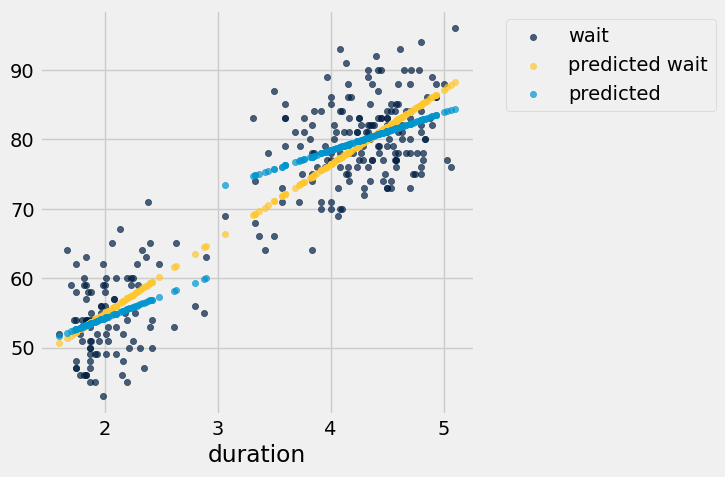

In [40]:
faithful.with_column('predicted', faithful.apply(predict_wait, 'duration')).scatter(0)

**Подальше дослідження (за бажання, без оцінки)**:  під час побудови лінії регресії окремо через кожен кластер  ми виявили дві різні, але схожі лінії. Ось кілька природних запитань, які варто дослідити, якщо ви хочете продовжити роботу з цими даними:
 * How much more accurate do we expect predictions to be using two lines instead of one? Can we measure this improvement using residuals?Наскільки ми очікуємо точніших прогнозів, якщо використовувати два рядки замість одного? Чи можемо ми виміряти це покращення за допомогою залишків?
 * Чи справді лінії регресії різні, чи вони просто випадково вийшли різними, тому що ми маємо лише невелику кількість спостережень? Що Ви могли б сказати?
 * Чи може бути так, що нахили (slope) ліній однакові, а перетини (intercept) різні? 

## Контроль

Ви закінчили з даною частиною практичної роботи! Аби перевірити, що всі завдання виконані вірно, виконайте наступні дії...
- **ВАЖЛИВО** Перш ніж щось робити, виберіть, **Save and Checkpoint** з меню `File`. Будь ласка, зробіть це спочатку, перш ніж запускати клітинку нижче,
- **запустіть усі тести та перевірте, чи всі вони пройшли успішно** (у наступній клітинці є перевірка для цього), 
- **Перегляньте notebook востаннє, перевірятися буде остаточний стан вашого notebook. Якщо ви вносили будь-які зміни, збережіть і запустіть всі рядки ще раз** Якщо ви вносили будь-які зміни, запустіть поллідовно всі рядки ще раз і збережіть **Save and Checkpoint** повторно.

In [1]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('pr2_5.ipynb', sorted(glob.glob('tests/q*.py'))))

After an eruption lasting 2 minutes, we predict you'll wait 54.933679813 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.1226039984 minutes until the next eruption.
After an eruption lasting 0 minutes, we predict you'll wait 33.4743970228 minutes until the next eruption.
After an eruption lasting 2.5 minutes, we predict you'll wait 60.2985005106 minutes until the next eruption.
After an eruption lasting 60 minutes, we predict you'll wait 677.252880731 minutes until the next eruption.
For points below 3, r is 0.290189526493 ; for points above 3, r is 0.372782225571
['tests/q2_1.py', 'tests/q3_1.py', 'tests/q3_2.py', 'tests/q3_3.py', 'tests/q4_1.py', 'tests/q5_1.py', 'tests/q5_2.py', 'tests/q5_3.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


Question 8:


Question 9:


Question 10:


Question 11:


Question 12:


Question 13:


Question 14:


Question 15:


Question 16:


1.0